In [1]:
import os
os.chdir(r'/Users/ryanmccrickerd/desktop/rypy')

In [2]:
import numpy as np
import pandas as pd
import rypy as rp
from matplotlib import pyplot as plt
from scipy.stats import norm
import mpl
% matplotlib inline

In [3]:
nx = np.newaxis
mpl.config(scale=1.5,print_keys=False)

In [4]:
σ,ρ,v,κ = 0.2,-0.7,0.4,np.inf
θ = σ,ρ,v,κ

In [34]:
T = np.array([1/256,1/52,1/12,1/4,1/2,1])[:,nx]
M = ['1D','1W','1M','3M','6M','1Y']
Δ = np.linspace(1,99,21)[nx,:]/100
k = (norm.ppf(Δ)*σ*np.sqrt(T))

In [36]:
pd.DataFrame(k,index=M,columns=Δ[0,:])

,0.01,0.059,0.108,0.157,0.206,0.255,0.304,0.353,0.402,0.451,...,0.549,0.598,0.647,0.696,0.745,0.794,0.843,0.892,0.941,0.99
1D,-0.021810,-0.014655,-0.011599,-0.009439,-0.007691,-0.006177,-0.004809,-0.003537,-0.002327,-0.001154,...,0.001154,0.002327,0.003537,0.004809,0.006177,0.007691,0.009439,0.011599,0.014655,0.021810
1W,-0.048391,-0.032517,-0.025736,-0.020944,-0.017065,-0.013705,-0.010670,-0.007847,-0.005162,-0.002561,...,0.002561,0.005162,0.007847,0.010670,0.013705,0.017065,0.020944,0.025736,0.032517,0.048391
1M,-0.100734,-0.067690,-0.053574,-0.043599,-0.035523,-0.028529,-0.022211,-0.016335,-0.010746,-0.005332,...,0.005332,0.010746,0.016335,0.022211,0.028529,0.035523,0.043599,0.053574,0.067690,0.100734
3M,-0.174476,-0.117242,-0.092793,-0.075515,-0.061528,-0.049413,-0.038470,-0.028293,-0.018613,-0.009235,...,0.009235,0.018613,0.028293,0.038470,0.049413,0.061528,0.075515,0.092793,0.117242,0.174476
6M,-0.246746,-0.165805,-0.131229,-0.106794,-0.087014,-0.069880,-0.054404,-0.040012,-0.026323,-0.013060,...,0.013060,0.026323,0.040012,0.054404,0.069880,0.087014,0.106794,0.131229,0.165805,0.246746
1Y,-0.348952,-0.234484,-0.185585,-0.151030,-0.123057,-0.098826,-0.076940,-0.056585,-0.037226,-0.018470,...,0.018470,0.037226,0.056585,0.076940,0.098826,0.123057,0.151030,0.185585,0.234484,0.348952


In [37]:
C = rp.pricer(T,k,θ)

In [38]:
BSV = rp.surface(T,k,C)

In [39]:
pd.DataFrame(BSV,index=M,columns=Δ[0,:])

,0.01,0.059,0.108,0.157,0.206,0.255,0.304,0.353,0.402,0.451,...,0.549,0.598,0.647,0.696,0.745,0.794,0.843,0.892,0.941,0.99
1D,0.234846,0.183022,0.159147,0.141403,0.126366,0.112727,0.099791,0.087085,0.074201,0.060700,...,0.033207,0.034481,0.039827,0.045725,0.051871,0.058358,0.065455,0.073718,0.084636,0.107514
1W,0.247158,0.200422,0.178673,0.162433,0.148634,0.136107,0.124239,0.112630,0.100967,0.088962,...,0.063144,0.051508,0.047192,0.048199,0.051109,0.054919,0.059460,0.064969,0.072395,0.088206
1M,0.242783,0.205398,0.187957,0.174945,0.163917,0.153947,0.144560,0.135459,0.126425,0.117279,...,0.098005,0.087659,0.077053,0.067384,0.060826,0.057967,0.057692,0.059192,0.062540,0.071354
3M,0.228150,0.199423,0.186112,0.176241,0.167928,0.160467,0.153498,0.146802,0.140225,0.133643,...,0.120027,0.112773,0.105068,0.096811,0.088001,0.078971,0.070754,0.064793,0.061831,0.063595
6M,0.215756,0.192408,0.181680,0.173775,0.167155,0.161247,0.155762,0.150523,0.145411,0.140330,...,0.129931,0.124445,0.118636,0.112380,0.105519,0.097855,0.089196,0.079574,0.069931,0.062986
1Y,0.202807,0.184363,0.175980,0.169847,0.164743,0.160215,0.156035,0.152067,0.148217,0.144413,...,0.136702,0.132670,0.128425,0.123871,0.118875,0.113235,0.106619,0.098412,0.087286,0.069546


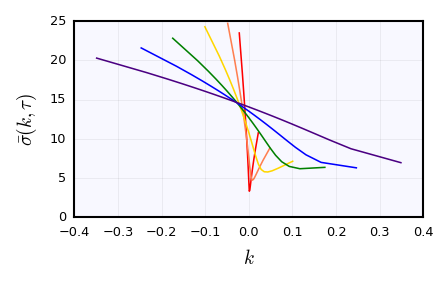

In [44]:
plot,axes = plt.subplots()
for i in range(len(T[:,0])):
    axes.plot(k[i,:],100*BSV[i,:])
    axes.set_xlabel(r'$k$')
    axes.set_ylabel(r'$\bar{\sigma}(k,\tau)$')

In [12]:
ψ1 = (BSV[:,2] - BSV[:,0])/(k[:,2] - k[:,0])
ψ2 = (BSV[:,2] - 2*BSV[:,1] + BSV[:,0])/(k[:,2] - k[:,1])**2

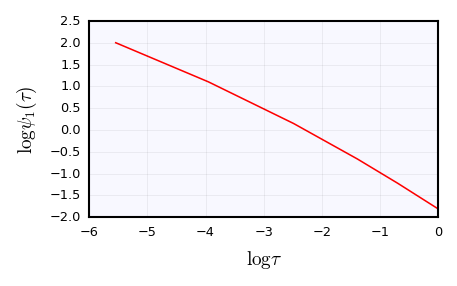

In [46]:
plot,axes = plt.subplots()
axes.plot(np.log(T[:,0]),np.log(np.sign(ρ)*ψ1))
axes.set_xlabel(r'$\log \tau$')
axes.set_ylabel(r'$\log \psi_1(\tau)$')

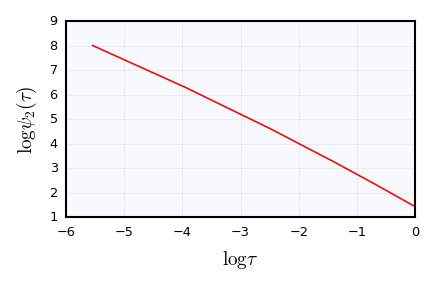

In [47]:
plot,axes = plt.subplots()
axes.plot(np.log(T[:,0]),np.log(ψ2))
axes.set_xlabel(r'$\log \tau$')
axes.set_ylabel(r'$\log \psi_2(\tau)$')

Now generate everything together

In [203]:
plt.rcParams['figure.figsize'] = [2*2*1.618,2*3]

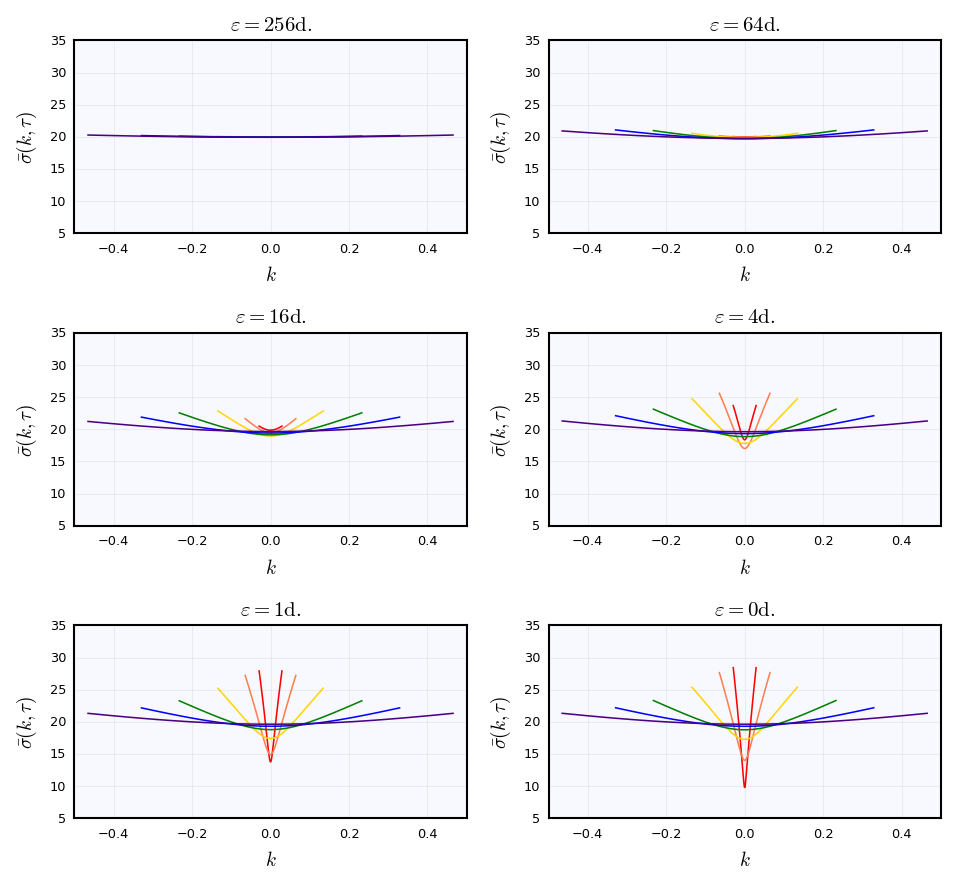

In [204]:
σ,ρ,v = 0.2,0,0.4
# σ,ρ,v = 0.2,-0.7,0.4
T = np.array([1/256,1/52,1/12,1/4,1/2,1])[:,nx]
M = ['1D','1W','1M','3M','6M','1Y']
S = np.array([['256','64'],['16','4'],['1','0']])
n = 101
Δ = np.linspace(1,99,n)[nx,:]/100
k = norm.ppf(Δ)*σ*np.sqrt(T)
κ_range = np.array([[1,4],[16,64],[256,np.inf]])

plot,axes = plt.subplots(3,2)
ψ1 = np.zeros((6,6))
ψ2 = np.zeros((6,6))
g = -1
for i in range(3):
    for j in range(2):
        κ = κ_range[i,j]
#         ij = i + j
        θ = σ,ρ,v,κ
        C = rp.pricer(T,k,θ)
        V = rp.surface(T,k,C)
        for h in range(6):
            axes[i,j].plot(k[h,:],100*V[h,:])
            axes[i,j].set_xlabel(r'$k$')
            axes[i,j].set_ylabel(r'$\bar{\sigma}(k,\tau)$')
            axes[i,j].set_title(r'$\varepsilon=%s\mathrm{d.}$'%S[i,j])
            axes[i,j].set_xlim([-0.5,0.5])
            axes[i,j].set_ylim([5,35])
        
        g += 1
        m = int((n - 1)/2)
        ψ1[g,:] = (V[:,m+1] - V[:,m-1])/(k[:,m+1] - k[:,m-1])
        ψ2[g,:] = (V[:,m+1] - 2*V[:,m] + V[:,m-1])/(k[:,m+1] - k[:,m])**2
plt.tight_layout()
fname = 'smile1'
if ρ == 0: fname = 'smile2'
plt.savefig(fname)

In [205]:
plt.rcParams['figure.figsize'] = [3*1.618,2.5]

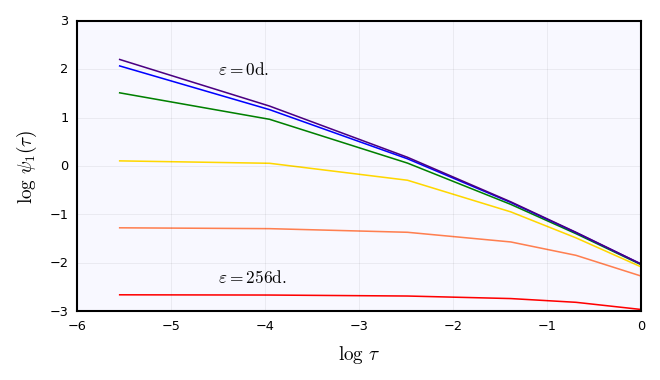

In [202]:
if ρ != 0:
    plot,axes = plt.subplots()
    for i in range(6):
        axes.plot(np.log(T[:,0]),np.log(np.sign(ρ)*ψ1[i,:]))
    axes.text(-4.5, -2.4, r'$\varepsilon = 256\mathrm{d.}$',fontsize='small')
    axes.text(-4.5, 1.9, r'$\varepsilon = 0\mathrm{d.}$',fontsize='small')
    axes.set_xlabel(r'$\log\ \tau$')
    axes.set_ylabel(r'$\log\ \psi_1(\tau)$')
    plt.savefig('skew')

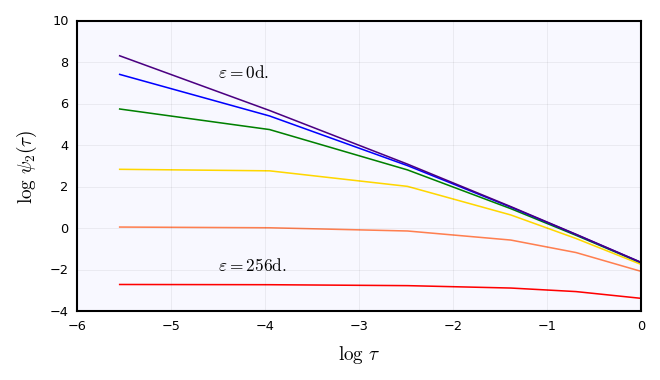

In [206]:
if ρ == 0:
    plot,axes = plt.subplots()
    for i in range(6):
        axes.plot(np.log(T[:,0]),np.log(ψ2[i,:]))
    axes.text(-4.5, -2, r'$\varepsilon = 256\mathrm{d.}$',fontsize='small')
    axes.text(-4.5, 7.3, r'$\varepsilon = 0\mathrm{d.}$',fontsize='small')
    axes.set_xlabel(r'$\log\ \tau$')
    axes.set_ylabel(r'$\log\ \psi_2(\tau)$')
    plt.savefig('curv')